# MLPR Lab 3: Principal Component Analysis (PCA)

Proshita Agarwal

Step 1: Import Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Step 2: Load the Image using OpenCV

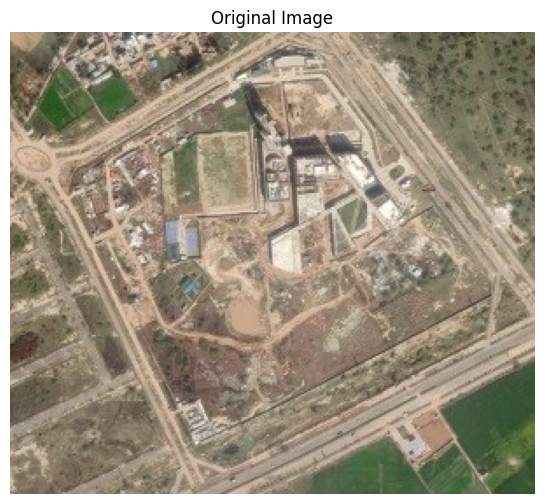

Original image shape: (264, 300, 3)


In [2]:
#loading the satellite image
image = cv2.imread('sat_image_plaksha.jpg')

#displaying the original image
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

print(f"Original image shape: {image.shape}")

Step 3: Convert the Image to Grayscale

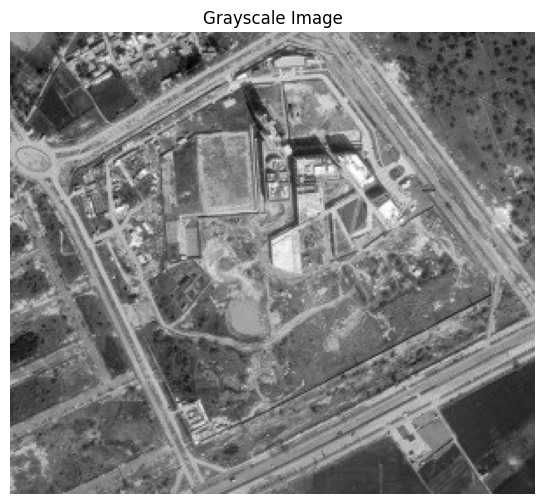

Grayscale image shape: (264, 300)


In [3]:
#conversionto grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#displaying the grayscale image
plt.figure(figsize=(8, 6))
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

print(f"Grayscale image shape: {gray_image.shape}")

Step 4: Convert Image to Double (float64)

In [4]:
#converting to float64 for mathematical operations
image_double = gray_image.astype(np.float64)

print(f"Image data type: {image_double.dtype}")
print(f"Image shape: {image_double.shape}")

Image data type: float64
Image shape: (264, 300)


Step 5: Compute Mean of Each Column and Subtract from Image

In [5]:
#computing the mean of each column (axis=0 for column-wise mean)
mean_column = np.mean(image_double, axis=0)

print(f"Mean column shape: {mean_column.shape}")

#subtracting the mean from the image (mean-centered data)
image_mean_subtracted = image_double - mean_column

print(f"Mean-subtracted image shape: {image_mean_subtracted.shape}")

Mean column shape: (300,)
Mean-subtracted image shape: (264, 300)


Step 6: Compute the Covariance Matrix

In [6]:
#computing the covariance matrix
#rowvar=False means each column represents a variable
#each row is an observation

covariance_matrix = np.cov(image_mean_subtracted, rowvar=False)

print(f"Covariance matrix shape: {covariance_matrix.shape}")

Covariance matrix shape: (300, 300)


Step 7: Get Eigenvalues and Eigenvectors

In [7]:
#computing eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

print(f"Eigenvalues shape: {eigenvalues.shape}")
print(f"Eigenvectors shape: {eigenvectors.shape}")
print(f"\nFirst 10 eigenvalues: {eigenvalues[:10]}")

Eigenvalues shape: (300,)
Eigenvectors shape: (300, 300)

First 10 eigenvalues: [56329.41125092+0.j 36634.00158313+0.j 29399.48126706+0.j
 22848.62235279+0.j 17350.88317204+0.j 16031.34803511+0.j
 13173.22437458+0.j 10558.99379472+0.j  9190.39667592+0.j
  8711.47108201+0.j]


Step 8: Sort Eigenvectors by Eigenvalues (Descending Order)

In [8]:
#getting indices that would sort eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]

#sortign eigenvalues and eigenvectors
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print(f"Sorted eigenvalues (first 10): {sorted_eigenvalues[:10].real}")
print(f"\nTotal number of components: {len(sorted_eigenvalues)}")

Sorted eigenvalues (first 10): [56329.41125092 36634.00158313 29399.48126706 22848.62235279
 17350.88317204 16031.34803511 13173.22437458 10558.99379472
  9190.39667592  8711.47108201]

Total number of components: 300


Step 9: Define Number of Principal Components to Keep

In [9]:
#defining the number of principal components to keep
num_components_list = [10, 20, 30, 40, 50, 60, 91]

print(f"Number of components to test: {num_components_list}")

Number of components to test: [10, 20, 30, 40, 50, 60, 91]


Step 10: Reconstruct Images for Each Number of Components

In [11]:
#list to store reconstructed images
output_images = []

for num_components in num_components_list:
    #taing N number of components (extract eigenvectors)
    selected_components = sorted_eigenvectors[:, :num_components].real
    
    #projecting the data onto the selected components
    projected_data = np.dot(selected_components.T, image_mean_subtracted.T).T
    
    #reconstructing the image
    reconstructed_image = np.dot(selected_components, projected_data.T).T + mean_column
    
    #appending reconstructed image to the list
    output_images.append(reconstructed_image)
    
    print(f"Components: {num_components}, Projected data shape: {projected_data.shape}, Reconstructed shape: {reconstructed_image.shape}")

print(f"\nTotal reconstructed images: {len(output_images)}")

Components: 10, Projected data shape: (264, 10), Reconstructed shape: (264, 300)
Components: 20, Projected data shape: (264, 20), Reconstructed shape: (264, 300)
Components: 30, Projected data shape: (264, 30), Reconstructed shape: (264, 300)
Components: 40, Projected data shape: (264, 40), Reconstructed shape: (264, 300)
Components: 50, Projected data shape: (264, 50), Reconstructed shape: (264, 300)
Components: 60, Projected data shape: (264, 60), Reconstructed shape: (264, 300)
Components: 91, Projected data shape: (264, 91), Reconstructed shape: (264, 300)

Total reconstructed images: 7


Step 11: Display the Results

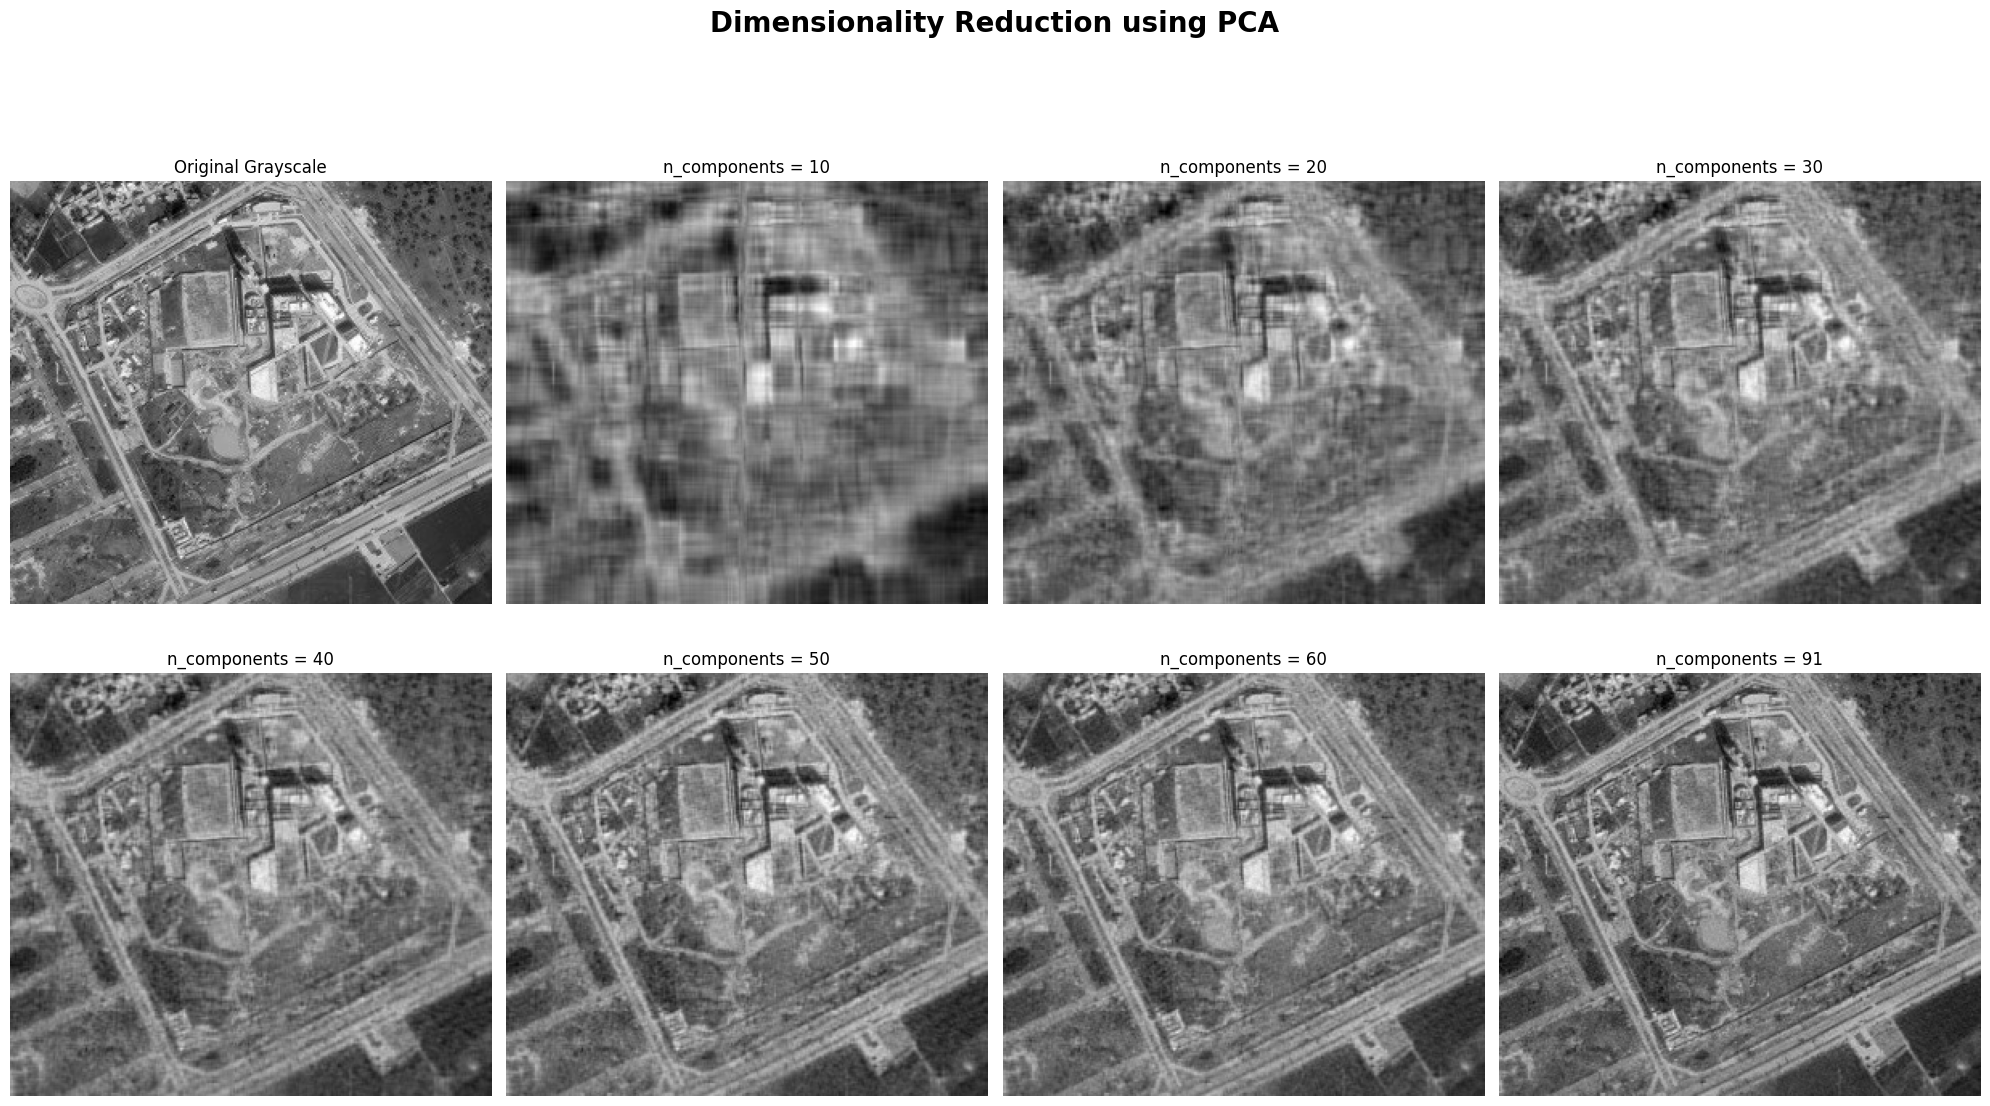

In [12]:
# Display the Results
plt.figure(figsize=(20, 12))
plt.suptitle('Dimensionality Reduction using PCA', fontsize=20, fontweight='bold')

#first, displaying the original grayscale image
plt.subplot(2, 4, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale', fontsize=12)
plt.axis('off')

#displaying reconstructed images for each number of components
for i, (num_components, reconstructed_img) in enumerate(zip(num_components_list, output_images)):
    plt.subplot(2, 4, i + 2)
    plt.imshow(reconstructed_img.real, cmap='gray')
    plt.title(f'n_components = {num_components}', fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

Step 12: Using sklearn's PCA to Explain Variance

In [13]:
from sklearn.decomposition import PCA

#Applying PCA with 91 components
num_components = 91
pca = PCA(n_components=num_components)

#Fitting PCA on the mean-subtracted image
pca.fit(image_mean_subtracted)

#getting explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print(f"Explained variance ratio for each component (first 10):")
print(explained_variance_ratio[:10])
print(f"\nCumulative explained variance with {num_components} components: {cumulative_variance_ratio[-1]:.4f} ({cumulative_variance_ratio[-1]*100:.2f}%)")

Explained variance ratio for each component (first 10):
[0.1542179  0.10029607 0.0804895  0.06255465 0.04750301 0.04389041
 0.03606547 0.02890827 0.02516134 0.02385015]

Cumulative explained variance with 91 components: 0.9506 (95.06%)


In [14]:
# Find the number of components needed to explain 95% variance
components_for_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Number of components needed to explain 95% variance: {components_for_95}")

# Variance explained by 91 components
print(f"\nTotal variance explained by 91 components: {cumulative_variance_ratio[-1]*100:.2f}%")

Number of components needed to explain 95% variance: 91

Total variance explained by 91 components: 95.06%


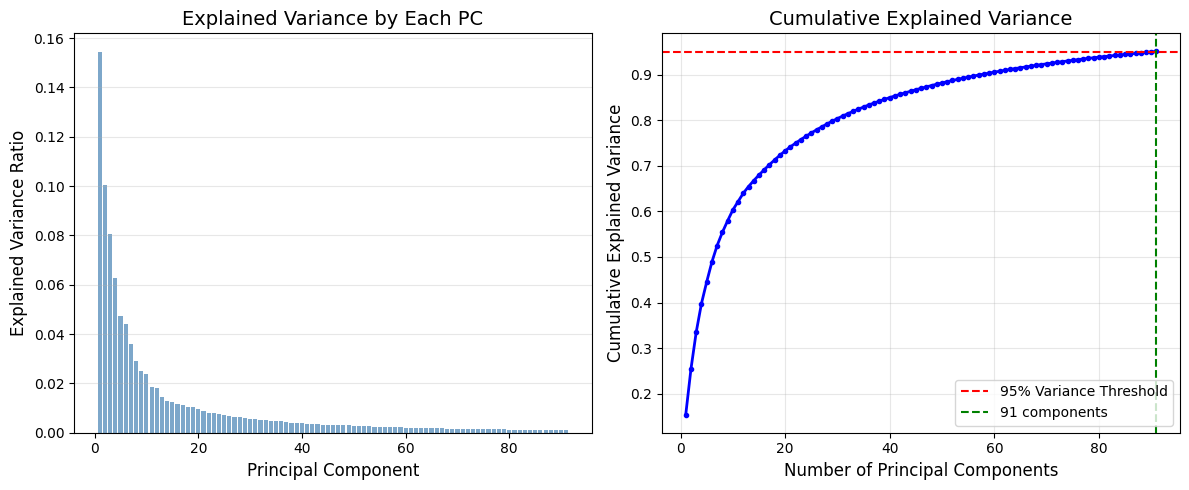

In [15]:
# Plot cumulative explained variance
plt.figure(figsize=(12, 5))

# Plot 1: Individual explained variance
plt.subplot(1, 2, 1)
plt.bar(range(1, num_components + 1), explained_variance_ratio, alpha=0.7, color='steelblue')
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.title('Explained Variance by Each PC', fontsize=14)
plt.grid(axis='y', alpha=0.3)

# Plot 2: Cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, num_components + 1), cumulative_variance_ratio, 'b-', linewidth=2, marker='o', markersize=3)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.axvline(x=components_for_95, color='g', linestyle='--', label=f'{components_for_95} components')
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.title('Cumulative Explained Variance', fontsize=14)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Report Questions

### Q1: What is the difference between PCA and Feature Selection?

The main difference is that feature selection just picks which original features to keep or throw away, while PCA actually creates new features by combining the old ones. 

With feature selection, if you have features like height, weight, and age, you might decide to only keep height and weight. The features you keep are still the same ones you started with.

PCA works differently: it mixes all your features together to make new ones called principal components. So you're not working with the original features anymore, you're working with combinations of them. This can capture more information in fewer dimensions, but the downside is that these new features don't really mean anything concrete like "height" or "weight" anymore.

### Q2: Why do we standardize features before applying PCA?

PCA looks at variance to decide which directions are important. If one feature has way bigger numbers than the others, it'll automatically have more variance just because of the scale, not because it's actually more important.

For example, if you have income (which could be like 50,000) and age (which might be 25), income will dominate the PCA just because the numbers are bigger. Standardizing(normalizing) puts everything on the same playing field so each feature gets judged fairly based on how it actually varies, not just its units.

### Q3: What is the importance of Covariance Matrix in PCA?

The covariance matrix basically shows how all the features relate to each other. It tells you which features tend to move together and which don't.

PCA needs this information to figure out the best directions to compress the data. When we calculate the eigenvectors and eigenvalues of the covariance matrix, we're finding those directions. The eigenvectors become our principal components, and the eigenvalues tell us how much information each component holds. Without the covariance matrix, we wouldn't know anything about the relationships in our data.

### Q4: What are some limitations of PCA?

One big problem is that you lose interpretability. After PCA, you can't really say what the new features mean anymore since they're just mathematical combinations of the originals.

PCA also only works well for linear relationships. If your data has more complex patterns, PCA might miss them. It's also pretty sensitive to outliers since it's based on variance. And sometimes PCA might throw away features with low variance that are actually important for whatever you're trying to predict or classify. You also have to remember to standardize your data first if the features are on different scales, which is an extra step.

### Q5: How can we figure out the importance of individual PCs in PCA?

You look at the eigenvalues or explained variance ratio for each component. Bigger eigenvalues mean that component captures more of the variation in your data.

The explained variance ratio is helpful because it's a percentage - it tells you what fraction of the total variance each component explains. You can also add them up cumulatively to see how many components you need to hit a certain threshold like 95% of variance. In the lab we used `pca.explained_variance_ratio_` to check this. A lot of people also make scree plots to visualize it and find the "elbow" where adding more components doesn't really help much anymore.